In [1]:

# imports
%matplotlib widget

import math
import time
from random import random, randrange, uniform, choice

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

from src.utils import dijkstra, distance, average
from src.graph import Graph, Line
from src.rrt import iRRT_s, RRT, RRT_s
from src.visualisation import plot_graph, plot_graph_simple
from src.prm import PRM

In [2]:
def evaluate_hole(variation, startposition, endposition, threshold, rand_radius, bias, goal, stepsize, sample_size):
    
    iterations = 200
    radii = np.linspace(1.,1.1,5)
    
    average_RRT_times = []
    average_BRRT_times = []
    std_RRT_times = []
    std_BRRT_times = []
    for radius in radii:
        obstacles = [(2.5,-1,-1,radius),(2.5,-1,1,radius),(2.5,1,-1,radius),(2.5,1,1,radius)]
        RRT_times = []
        BRRT_times = []
        print(radius)
        for sample in range(sample_size):
            obstacle_bias = False
            print(sample, obstacle_bias)            
            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal, fix_room_size=True)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal, fix_room_size=True)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal, fix_room_size=True)
                end_RRT = time.time()
            elif variation == 'prm':
                start_RRT = time.time() #record start time
                prm_planner = PRM(iterations, obstacles= obstacles, start= startposition, destination = endposition, goal=goal, fix_room_size=True)
                prm_planner.runPRM()
                end_RRT = time.time()
            
            RRT_time = end_RRT - start_RRT
            RRT_times.append(RRT_time)
            print(RRT_time)
            obstacle_bias = True
            print(sample, obstacle_bias)  
            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal, fix_room_size=True)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal, fix_room_size=True)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal, fix_room_size=True)
                end_RRT = time.time()
            elif variation == 'prm':
                start_RRT = time.time() #record start time
                prm_planner = PRM(iterations, obstacles= obstacles, start= startposition, destination = endposition, goal=goal, fix_room_size=True)
                prm_planner.runPRM()
                end_RRT = time.time()
            
            BRRT_time = end_RRT - start_RRT
            BRRT_times.append(BRRT_time)
            print(BRRT_time)
        average_RRT_time = average(RRT_times)
        std_RRT_time = np.std(RRT_times)
        average_RRT_times.append(average_RRT_time)
        std_RRT_times.append(std_RRT_time) 
        
        average_BRRT_time = average(BRRT_times)
        std_BRRT_time = np.std(BRRT_times)
        average_BRRT_times.append(average_BRRT_time)
        std_BRRT_times.append(std_BRRT_time) 
     
    return average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times


if __name__ == '__main__':
    startposition = (0.,0.,0.)
    endposition = (5.,0.,0.)
    
    threshold = 1. 
    stepsize = 1. 
    goal = 1.5
    bias = 0.2
    rand_radius = 0.5
    
    sample_size = 5
    
    #average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times = evaluate_single('RRT', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size)
    average_RRTs_times, average_BRRTs_times, std_RRTs_times, std_BRRTs_times = evaluate_hole('RRT_s', startposition, endposition, threshold, rand_radius, bias, goal, stepsize, sample_size)
    average_iRRTs_times, average_iBRRTs_times, std_iRRTs_times, std_iBRRTs_times = evaluate_hole('iRRT_s', startposition, endposition, threshold, rand_radius, bias, goal, stepsize, sample_size)
    average_prm_times, average_Bprm_times, std_prm_times, std_Bprm_times = evaluate_hole('prm', startposition, endposition, threshold, rand_radius, bias, goal, stepsize, sample_size)


1.0
0 False


In [4]:
save_to_disk = True
if save_to_disk:
        np.save("saved_results_hole/{average_RRTs_times}.npy", average_RRTs_times)
        np.save("saved_results_hole/{average_BRRTs_times}.npy", average_BRRTs_times)
        np.save("saved_results_hole/{average_iRRTs_times}.npy", average_iRRTs_times)
        np.save("saved_results_hole/{average_iBRRTs_times}.npy", average_iBRRTs_times)
        np.save("saved_results_hole/{average_prm_times}.npy", average_prm_times)

In [6]:
fig = plt.figure()
radii = np.linspace(1.,1.1,5)
axis = []
for radius in radii:
    axis.append((2*np.sqrt(2)-2*radius)/(2+2*radius)*100)
print(axis)
plt.yscale('log')
plt.ylabel('Generation Time in s')
plt.xlabel('Hole diameter as percentage of obstacle width and height')
#plt.errorbar(radii, average_RRT_times, yerr = std_RRT_times, label = "RRT", color = 'o', ecolor='black', capsize=10)
#plt.errorbar(radii, average_BRRT_times, yerr = std_BRRT_times, label = "Biased RRT", linestyle='--', color = 'o', ecolor='black', capsize=10)
#plt.errorbar(radii, average_RRTs_times, yerr = std_RRTs_times, label = "RRT*", color = 'g', ecolor='black', capsize=10)
#plt.errorbar(radii, average_BRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_BRRTs_times] , label = "Biased RRT*", linestyle='--', color = 'g', ecolor='black', capsize=10)
#plt.errorbar(radii, average_iRRTs_times, yerr = std_iRRTs_times, label = "informed RRT*", color = 'b', ecolor='black', capsize=10)
#plt.errorbar(radii, average_iBRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_iBRRTs_times], label = "Biased informed RRT*", linestyle='--', color = 'b', ecolor='black', capsize=10)
plt.plot(axis, average_RRTs_times, label = "RRT*", color = 'g')
plt.plot(axis, average_BRRTs_times, label = "Biased RRT*", linestyle='--', color = 'g')
plt.plot(axis, average_iRRTs_times, label = "informed RRT*", color = 'b')
plt.plot(axis, average_iBRRTs_times, label = "Biased informed RRT*", linestyle='--', color = 'b')
plt.plot(axis, average_prm_times, label = "PRM", color = 'r')
plt.title('Computation time compared to hole size')
plt.legend()
print(average_RRTs_times)
print(std_RRTs_times)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[20.71067811865476, 19.220422833239272, 17.766515237711957, 16.347641560149153, 14.962550589195004]
[0.022689104080200195, 0.017934513092041016, 0.01403360366821289, 0.014943838119506836, 0.014319133758544923]
[0.013291273219772375, 0.004120462978586951, 0.004450404180605062, 0.004462817774152679, 0.005100071227342219]


In [3]:
from tqdm import tqdm, trange

def evaluate_multiple(variation, startposition, endposition, threshold, rand_radius, bias, goal, stepsize, sample_size):
    
    iterations = 200
    
    num_obstacles_list = [3,5,7,9,11]
    print(num_obstacles_list)
    average_RRT_times = []
    average_BRRT_times = []
    std_RRT_times = []
    std_BRRT_times = []
    for num_obst in tqdm(num_obstacles_list, position=0, leave=True):
        
        RRT_times = []
        BRRT_times = []
        
        for sample in trange((sample_size), position=0, leave=True):
            obstacles = []
            for i in range(num_obst):
                obstacles.append(rand_obst())
            
            obstacle_bias = False
                   
            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            
            RRT_time = end_RRT - start_RRT
            RRT_times.append(RRT_time)
            
            obstacle_bias = True
             
            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            
            BRRT_time = end_RRT - start_RRT
            BRRT_times.append(BRRT_time)
            
        average_RRT_time = average(RRT_times)
        std_RRT_time = np.std(RRT_times)
        average_RRT_times.append(average_RRT_time)
        std_RRT_times.append(std_RRT_time) 
        
        average_BRRT_time = average(BRRT_times)
        std_BRRT_time = np.std(BRRT_times)
        average_BRRT_times.append(average_BRRT_time)
        std_BRRT_times.append(std_BRRT_time) 
     
    return average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times

if __name__ == '__main__':
    startposition = (0.,0.,0.)
    endposition = (5.,0.,0.)
    
    threshold = 1. 
    stepsize = 1. 
    goal = 5.
    bias = 0.2
    rand_radius = 0.5
    
    sample_size = 100
    
    #average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times = evaluate_single('RRT', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size)
    average_RRTs_times, average_BRRTs_times, std_RRTs_times, std_BRRTs_times = evaluate_multiple('RRT_s', startposition, endposition, threshold, rand_radius, bias, goal, stepsize, sample_size)
    #average_iRRTs_times, average_iBRRTs_times, std_iRRTs_times, std_iBRRTs_times = evaluate_hole('iRRT_s', startposition, endposition, threshold, rand_radius, bias, goal, stepsize, sample_size)

[3, 5, 7, 9, 11]


100%|██████████| 5/5 [1:34:02<00:00, 1128.57s/it]


[4.944017724990845, 6.19951984167099, 9.31525425195694, 9.918867259025573, 7.7349007487297055]
[8.849795378480607, 13.956287298449494, 16.365236259804643, 24.895112833155707, 13.87394611590351]


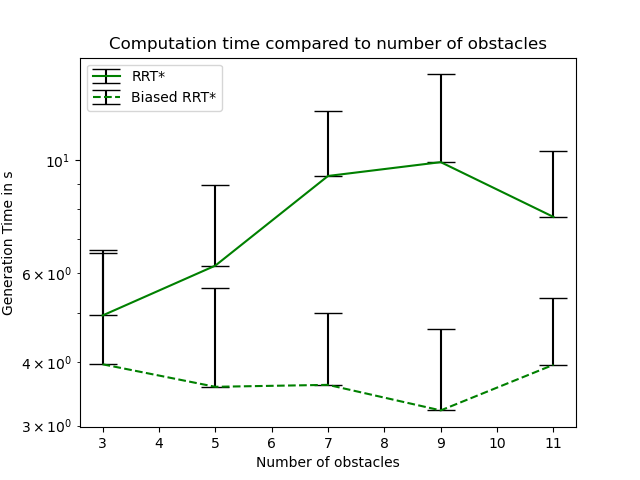

In [7]:
fig = plt.figure()
num_obstacles_list = [3,5,7,9,11]
plt.yscale('log')
plt.ylabel('Generation Time in s')
plt.xlabel('Number of obstacles')
#plt.errorbar(radii, average_RRT_times, yerr = std_RRT_times, label = "RRT", color = 'o', ecolor='black', capsize=10)
#plt.errorbar(radii, average_BRRT_times, yerr = std_BRRT_times, label = "Biased RRT", linestyle='--', color = 'o', ecolor='black', capsize=10)
plt.errorbar(num_obstacles_list, average_RRTs_times, yerr = ([0,0,0,0,0],[i * (1.95/np.sqrt(sample_size)) for i in std_RRTs_times]), label = "RRT*", color = 'g', ecolor='black', capsize=10)
plt.errorbar(num_obstacles_list, average_BRRTs_times, yerr = ([0,0,0,0,0],[i * (1.95/np.sqrt(sample_size)) for i in std_BRRTs_times]) , label = "Biased RRT*", linestyle='--', color = 'g', ecolor='black', capsize=10)
#plt.errorbar(radii, average_iRRTs_times, yerr = std_iRRTs_times, label = "informed RRT*", color = 'b', ecolor='black', capsize=10)
#plt.errorbar(radii, average_iBRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_iBRRTs_times], label = "Biased informed RRT*", linestyle='--', color = 'b', ecolor='black', capsize=10)
#plt.plot(num_obstacles_list, average_RRTs_times, label = "RRT*", color = 'g')
#plt.plot(num_obstacles_list, average_BRRTs_times, label = "Biased RRT*", linestyle='--', color = 'g')
#plt.plot(axis, average_iRRTs_times, label = "informed RRT*", color = 'b')
#plt.plot(axis, average_iBRRTs_times, label = "Biased informed RRT*", linestyle='--', color = 'b')
plt.title('Computation time compared to number of obstacles')
plt.legend()
print(average_RRTs_times)
print(std_RRTs_times)

In [69]:
def evaluate_single(variation, startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size):
    obstacles = [(5.,2.5,2.5,3)]
    goals = np.linspace(1.34,1.39,6)
    iterations = 200
    
    
    average_RRT_times = []
    average_BRRT_times = []
    std_RRT_times = []
    std_BRRT_times = []
    for goal in goals:
        RRT_times = []
        BRRT_times = []
        for sample in range(sample_size):
            obstacle_bias = False
                        
            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            
            RRT_time = end_RRT - start_RRT
            RRT_times.append(RRT_time)
            
            obstacle_bias = True
            
            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            
            BRRT_time = end_RRT - start_RRT
            BRRT_times.append(BRRT_time)

        average_RRT_time = average(RRT_times)
        std_RRT_time = np.std(RRT_times)
        average_RRT_times.append(average_RRT_time)
        std_RRT_times.append(std_RRT_time) 
        
        average_BRRT_time = average(BRRT_times)
        std_BRRT_time = np.std(BRRT_times)
        average_BRRT_times.append(average_BRRT_time)
        std_BRRT_times.append(std_BRRT_time) 
     
    return average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times


if __name__ == '__main__':
    startposition = (0.,0.,0.)
    endposition = (10.,5.,5.)
    
    threshold = 2. 
    stepsize = 1. 

    bias = 0.2
    rand_radius = 0.5
    
    sample_size = 3
    
    #average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times = evaluate_single('RRT', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size)
    average_RRTs_times, average_BRRTs_times, std_RRTs_times, std_BRRTs_times = evaluate_single('RRT_s', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size)
    average_iRRTs_times, average_iBRRTs_times, std_iRRTs_times, std_iBRRTs_times = evaluate_single('iRRT_s', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size)

[6.120678106943767, 2.8324126402537027, 5.540261427561442, 2.836888074874878, 1.540477991104126, 2.575699806213379]
[3.406527246966583, 2.6566968698585014, 5.0901724331493154, 2.376923103618451, 1.615809316316339, 1.7793620753156472]


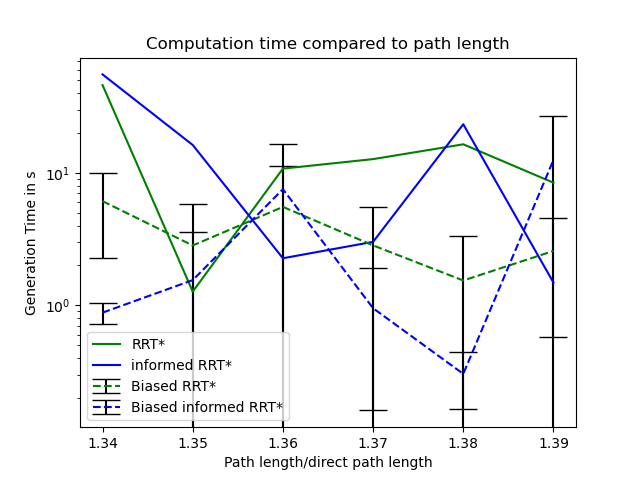

In [70]:
fig = plt.figure()
goals = np.linspace(1.34,1.39,6)
plt.yscale('log')
plt.ylabel('Generation Time in s')
plt.xlabel('Path length/direct path length')
#plt.errorbar(goals, average_RRT_times, yerr = std_RRT_times, label = "RRT", color = 'o', ecolor='black', capsize=10)
#plt.errorbar(goals, average_BRRT_times, yerr = std_BRRT_times, label = "Biased RRT", linestyle='--', color = 'o', ecolor='black', capsize=10)
#plt.errorbar(goals, average_RRTs_times, yerr = std_RRTs_times, label = "RRT*", color = 'g', ecolor='black', capsize=10)
plt.errorbar(goals, average_BRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_BRRTs_times] , label = "Biased RRT*", linestyle='--', color = 'g', ecolor='black', capsize=10)
#plt.errorbar(goals, average_iRRTs_times, yerr = std_iRRTs_times, label = "informed RRT*", color = 'b', ecolor='black', capsize=10)
plt.errorbar(goals, average_iBRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_iBRRTs_times], label = "Biased informed RRT*", linestyle='--', color = 'b', ecolor='black', capsize=10)
plt.plot(goals, average_RRTs_times, label = "RRT*", color = 'g')
#plt.plot(goals, average_BRRTs_times, label = "Biased RRT*", linestyle='--', color = 'g')
plt.plot(goals, average_iRRTs_times, label = "informed RRT*", color = 'b')
#plt.plot(goals, average_iBRRTs_times, label = "Biased informed RRT*", linestyle='--', color = 'b')
plt.title('Computation time compared to path length')
plt.legend()
print(average_BRRTs_times)
print(std_BRRTs_times)


In [81]:
def evaluate_bias(variation, startposition, endposition, threshold, rand_radius, goal, stepsize, sample_size):
    obstacles = [(5.,2.5,2.5,3)]
    bias_list = np.linspace(0,0.8,9)
    iterations = 200
    obstacle_bias = True
    average_BRRT_times = []
   
    std_BRRT_times = []
    for bias in bias_list:
        
        BRRT_times = []
        for sample in range(sample_size):

            if variation == 'RRT':
                start_RRT = time.time()
                G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'RRT_s':
                start_RRT = time.time()
                G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            elif variation == 'iRRT_s':
                start_RRT = time.time()
                G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize, goal)
                end_RRT = time.time()
            
            BRRT_time = end_RRT - start_RRT
            BRRT_times.append(BRRT_time)
        
        average_BRRT_time = average(BRRT_times)
        std_BRRT_time = np.std(BRRT_times)
        average_BRRT_times.append(average_BRRT_time)
        std_BRRT_times.append(std_BRRT_time) 
     
    return average_BRRT_times, std_BRRT_times


if __name__ == '__main__':
    startposition = (0.,0.,0.)
    endposition = (10.,5.,5.)
    
    threshold = 2. 
    stepsize = 1. 

    goal = 1.36
    rand_radius = 0.5
    
    sample_size = 20
    
    #average_RRT_times, average_BRRT_times, std_RRT_times, std_BRRT_times = evaluate_single('RRT', startposition, endposition, threshold, rand_radius, bias, stepsize, sample_size)
    average_BRRTs_times, std_BRRTs_times = evaluate_bias('RRT_s', startposition, endposition, threshold, rand_radius, goal, stepsize, sample_size)
    average_iBRRTs_times, std_iBRRTs_times = evaluate_bias('iRRT_s', startposition, endposition, threshold, rand_radius, goal, stepsize, sample_size)

[8.659072875976562, 4.531684494018554, 2.9920475363731383, 11.022029900550843, 4.689996552467346, 3.2892539739608764, 27.342872273921966, 29.530092203617095, 145.61395404338836]
[19.431146942585773, 7.059116105975554, 3.473166774730473, 33.270934910304256, 8.757011423194806, 5.624928151783951, 83.4055115519692, 69.61861403941711, 427.30161637880167]


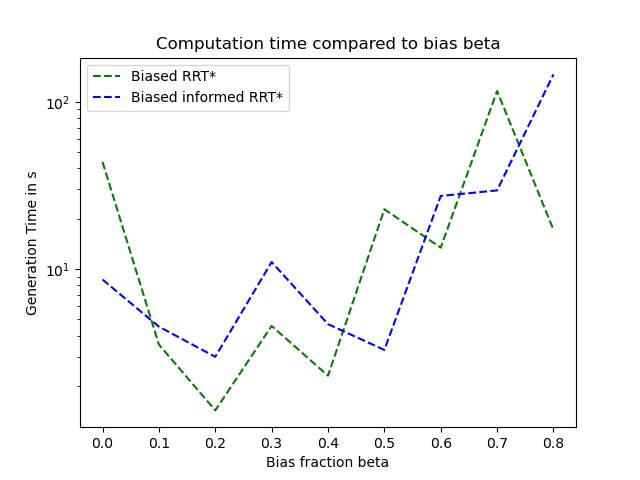

In [90]:
fig = plt.figure()
bias_list = np.linspace(0,0.8,9)
plt.yscale('log')
plt.ylabel('Generation Time in s')
plt.xlabel('Bias fraction beta')

#plt.errorbar(bias_list, average_BRRT_times, yerr = std_BRRT_times, label = "Biased RRT", linestyle='--', color = 'o', ecolor='black', capsize=10)
#plt.errorbar(bias_list, average_BRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_BRRTs_times] , label = "Biased RRT*", linestyle='--', color = 'g')
#plt.errorbar(bias_list, average_iRRTs_times, yerr = std_iRRTs_times, label = "informed RRT*", color = 'b', ecolor='black', capsize=10)
#plt.errorbar(bias_list, average_iBRRTs_times, yerr = [i * (1.95/np.sqrt(sample_size)) for i in std_iBRRTs_times], label = "Biased informed RRT*", linestyle='--', color = 'b')

plt.plot(bias_list, average_BRRTs_times, label = "Biased RRT*", linestyle='--', color = 'g')

plt.plot(bias_list, average_iBRRTs_times, label = "Biased informed RRT*", linestyle='--', color = 'b')
plt.title('Computation time compared to bias beta')
plt.legend()
print(average_iBRRTs_times)
print(std_iBRRTs_times)

In [ ]:
# Doing many iterations and compare, will take some time
if __name__ == '__main__':
    
    startposition = (0.,0.,0.)
    endposition = (10.,5.,5.)
    obstacles = [(1.,1.,1.,.5),(3.,4.,5.,1.),(4,2,3,1),(6,3,1,2),(6,1,1,2),(8,1,4,1)]
    iterations = 200
    threshold = 2. #for marking the end position as found
    stepsize = 1. # stepsize of newly generated vertices
    
    #some parameters for the obstacle bias attempt
    obstacle_bias = False
    bias = 0.2
    rand_radius = 0.5
    
    sample_size = 100
    
    RRT_times = []
    RRT_lengths = []
    RRT_succesrate = 0
    for sample in range(sample_size):
        
        start_RRT = time.time() #record start time
        G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        RRT_time = end_RRT - start_RRT
        RRT_times.append(RRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            RRT_lengths.append(length)
            RRT_succesrate = RRT_succesrate + 1
        else:
            RRT_succesrate = RRT_succesrate
    
    average_RRT_time = average(RRT_times)
    average_RRT_length = average(RRT_lengths)
    RRT_succes_percentage = (RRT_succesrate/sample_size)*100
    
    obstacle_bias = True
    BRRT_times = []
    BRRT_lengths = []
    BRRT_succesrate = 0
    for sample in range(sample_size):
        
        start_RRT = time.time() #record start time
        G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        BRRT_time = end_RRT - start_RRT
        BRRT_times.append(BRRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            BRRT_lengths.append(length)
            BRRT_succesrate = BRRT_succesrate + 1
        else:
            BRRT_succesrate = BRRT_succesrate
    
    average_BRRT_time = average(BRRT_times)
    average_BRRT_length = average(BRRT_lengths)
    BRRT_succes_percentage = (BRRT_succesrate/sample_size)*100
    
    print('The direct path is of length:', round(distance(startposition,endposition),2))
    print('The average time for RRT was: '+str(round(average_RRT_time,2))+ 's')
    print('The average time for Biased RRT was: '+str(round(average_BRRT_time,2))+ 's')
    print('The average length for RRT was: '+str(round(average_RRT_length,2)))
    print('The average length for Biased RRT was: '+str(round(average_BRRT_length,2)))
    print('The RRT generation had a succesrate of: '+str(round(RRT_succes_percentage,2))+ '%')
    print('The Biased RRT generation had a succesrate of: '+str(round(BRRT_succes_percentage,2))+ '%')

In [2]:
# Evaluate at various bias settings, will take some time


startposition = (0.,0.,0.)
endposition = (10.,5.,5.)
obstacles = [(5.,2.5,2.5,3)]
iterations = 300
threshold = 2. #for marking the end position as found
stepsize = 1. # stepsize of newly generated vertices

#some parameters for the obstacle bias attempt
obstacle_bias = True
bias_list = np.linspace(0,0.8,9)
print(bias_list)
rand_radius = 0.5

sample_size = 5

average_BRRT_times = []
average_BRRT_lengths = []
BRRT_succes_percentages = []
std_BRRT_times = []
std_BRRT_lengths = []

average_BRRTs_times = []
average_BRRTs_lengths = []
BRRTs_succes_percentages = []
std_BRRTs_times = []
std_BRRTs_lengths = []

average_iBRRTs_times = []
average_iBRRTs_lengths = []
iBRRTs_succes_percentages = []
std_iBRRTs_times = []
std_iBRRTs_lengths = []

for bias in bias_list:
    BRRT_times = []
    BRRT_lengths = []
    BRRT_succesrate = 0
    for sample in range(sample_size):

        start_RRT = time.time() #record start time
        G = RRT(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        BRRT_time = end_RRT - start_RRT
        BRRT_times.append(BRRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            BRRT_lengths.append(length)
            BRRT_succesrate = BRRT_succesrate + 1
        else:
            BRRT_succesrate = BRRT_succesrate

    average_BRRT_time = average(BRRT_times)
    average_BRRT_length = average(BRRT_lengths)
    BRRT_succes_percentage = (BRRT_succesrate/sample_size)*100
    std_BRRT_time = np.std(BRRT_times)
    if len(BRRT_lengths) == 0:
        std_BRRT_length = 0
    else:
        std_BRRT_length = np.std(BRRT_lengths)

    average_BRRT_times.append(average_BRRT_time)
    average_BRRT_lengths.append(average_BRRT_length)
    BRRT_succes_percentages.append(BRRT_succes_percentage)
    std_BRRT_times.append(std_BRRT_time) 
    std_BRRT_lengths.append(std_BRRT_length) 

for bias in bias_list:
    BRRT_times = []
    BRRT_lengths = []
    BRRT_succesrate = 0
    for sample in range(sample_size):

        start_RRT = time.time() #record start time
        G = RRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        BRRT_time = end_RRT - start_RRT
        BRRT_times.append(BRRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            BRRT_lengths.append(length)
            BRRT_succesrate = BRRT_succesrate + 1
        else:
            BRRT_succesrate = BRRT_succesrate

    average_BRRT_time = average(BRRT_times)
    average_BRRT_length = average(BRRT_lengths)
    BRRT_succes_percentage = (BRRT_succesrate/sample_size)*100
    std_BRRT_time = np.std(BRRT_times)
    if len(BRRT_lengths) == 0:
        std_BRRT_length = 0
    else:
        std_BRRT_length = np.std(BRRT_lengths)

    average_BRRTs_times.append(average_BRRT_time)
    average_BRRTs_lengths.append(average_BRRT_length)
    BRRTs_succes_percentages.append(BRRT_succes_percentage)
    std_BRRTs_times.append(std_BRRT_time) 
    std_BRRTs_lengths.append(std_BRRT_length) 

for bias in bias_list:
    BRRT_times = []
    BRRT_lengths = []
    BRRT_succesrate = 0
    for sample in range(sample_size):

        start_RRT = time.time() #record start time
        G = iRRT_s(startposition, endposition, obstacles, iterations, threshold, rand_radius, bias, obstacle_bias, stepsize)
        end_RRT = time.time()
        BRRT_time = end_RRT - start_RRT
        BRRT_times.append(BRRT_time)
        if G.found_path:
            found_path = dijkstra(G)
            length = 0.
            for path in range(len(found_path)-1):
                length = length + distance((found_path[path][0],found_path[path][1],found_path[path][2]),(found_path[path+1][0],found_path[path+1][1],found_path[path+1][2]))
            BRRT_lengths.append(length)
            BRRT_succesrate = BRRT_succesrate + 1
        else:
            BRRT_succesrate = BRRT_succesrate

    average_BRRT_time = average(BRRT_times)
    average_BRRT_length = average(BRRT_lengths)
    BRRT_succes_percentage = (BRRT_succesrate/sample_size)*100
    std_BRRT_time = np.std(BRRT_times)
    if len(BRRT_lengths) == 0:
        std_BRRT_length = 0
    else:
        std_BRRT_length = np.std(BRRT_lengths)

    average_iBRRTs_times.append(average_BRRT_time)
    average_iBRRTs_lengths.append(average_BRRT_length)
    iBRRTs_succes_percentages.append(BRRT_succes_percentage)
    std_iBRRTs_times.append(std_BRRT_time) 
    std_iBRRTs_lengths.append(std_BRRT_length)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

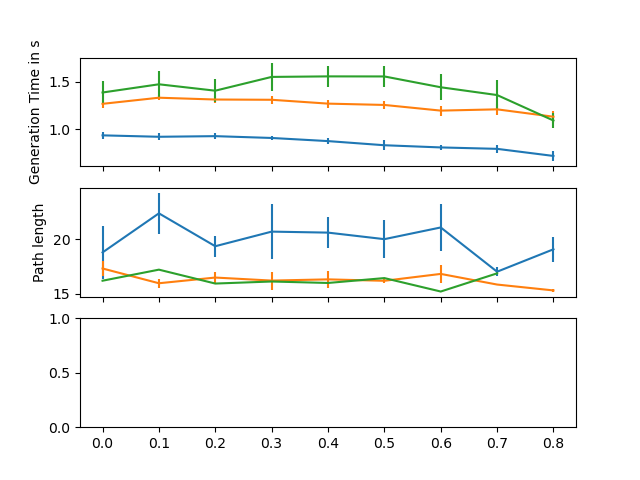

In [4]:

fig, ax = plt.subplots(3,sharex=True)

#plt.plot(bias_list, average_BRRT_times, label = "Generation time")

ax[0].set_ylabel('Generation Time in s')
ax[0].errorbar(bias_list, average_BRRT_times, yerr = std_BRRT_times, label = "RRT")
ax[0].errorbar(bias_list, average_BRRTs_times, yerr = std_BRRTs_times, label = "RRT*")
ax[0].errorbar(bias_list, average_iBRRTs_times, yerr = std_iBRRTs_times, label = "informed RRT*")


#plt.plot(bias_list, average_BRRT_lengths, label = "RRT")
#plt.plot(bias_list, average_BRRTs_lengths, label = "RRT*")

ax[1].set_ylabel('Path length')
ax[1].errorbar(bias_list, average_BRRT_lengths, yerr = std_BRRT_lengths, label = "RRT")
ax[1].errorbar(bias_list, average_BRRTs_lengths, yerr = std_BRRTs_lengths, label = "RRT*")
ax[1].errorbar(bias_list, average_iBRRTs_lengths, yerr = std_iBRRTs_lengths, label = "Informed RRT*")


ax[2].plot(bias_list, BRRT_succes_percentages, label = "RRT")
ax[2].plot(bias_list, BRRTs_succes_percentages, label = "RRT*")
ax[2].plot(bias_list, iBRRTs_succes_percentages, label = "Informed RRT*")
ax[2].set_xlabel('Obstacle Bias')
ax[2].set_ylabel('Succes Rate')

handles, labels = ax[2].get_legend_handles_labels()
fig.set_figheight(10)
fig.legend(handles, labels, loc="lower left", bbox_to_anchor=(0.12,0.1))

